In [21]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
# Load the dataset
file_path = "Final_Dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('User_ID,Age,Gender,Total_App_Us')

In [23]:
# Create an age group feature
def age_group(age):
    if 20 <= age <= 30:
        return 'Young'
    elif 30 < age <= 50:
        return 'Middle'
    elif 50 < age <= 60:
        return 'Older'
    else:
        return None

df['Age_Group'] = df['Age'].apply(age_group)
df = df[df['Age_Group'].notna()]

In [24]:
label_encoders = {}
for col in ['Gender', 'Location', 'Relationship_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # Store the encoders for later use

df = df.dropna() # Remove rows with missing values

# Prepare data for modeling
X = df.drop(columns=['User_ID', 'Age', 'Age_Group'])
y = df['Age_Group'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

In [25]:
# Train and evaluate Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose() # Display classification report

,precision,recall,f1-score,support
Middle,0.983333,0.508621,0.670455,116.000000
Older,0.700000,1.000000,0.823529,35.000000
Young,0.607477,0.984848,0.751445,66.000000
accuracy,0.732719,0.732719,0.732719,0.732719
macro avg,0.763603,0.831156,0.748476,217.000000
weighted avg,0.823319,0.732719,0.719777,217.000000


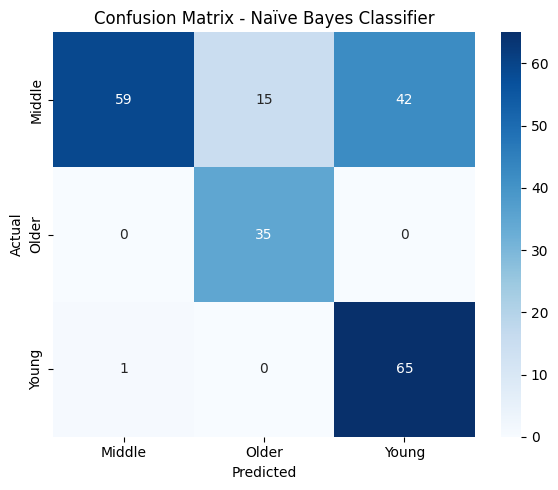

In [26]:
# Create confusion matrix for Naïve Bayes
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes Classifier')
plt.tight_layout()
plt.show() # Display confusion matrix

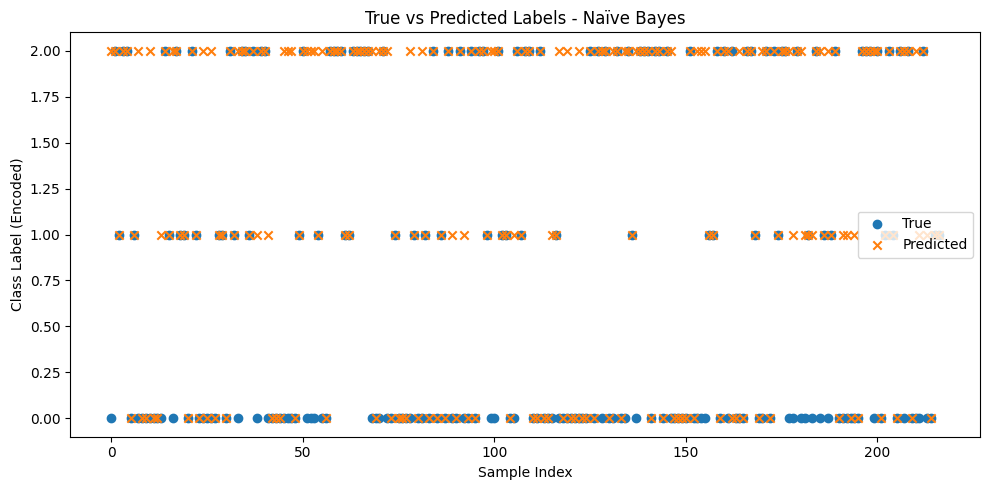

In [27]:
# Plot true vs. predicted labels for Naïve Bayes
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_encoded)), y_test_encoded, label='True', marker='o')
plt.scatter(range(len(y_pred_encoded)), y_pred_encoded, label='Predicted', marker='x')
plt.title("True vs Predicted Labels - Naïve Bayes")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (Encoded)")
plt.legend()
plt.tight_layout()
plt.show() # Display true vs. predicted labels plot

In [28]:
# Train and evaluate k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test, y_knn_pred, output_dict=True)
pd.DataFrame(knn_report).transpose() # Display classification report

,precision,recall,f1-score,support
Middle,0.991228,0.974138,0.982609,116.000000
Older,1.000000,1.000000,1.000000,35.000000
Young,0.955882,0.984848,0.970149,66.000000
accuracy,0.981567,0.981567,0.981567,0.981567
macro avg,0.982370,0.986329,0.984253,217.000000
weighted avg,0.981893,0.981567,0.981624,217.000000


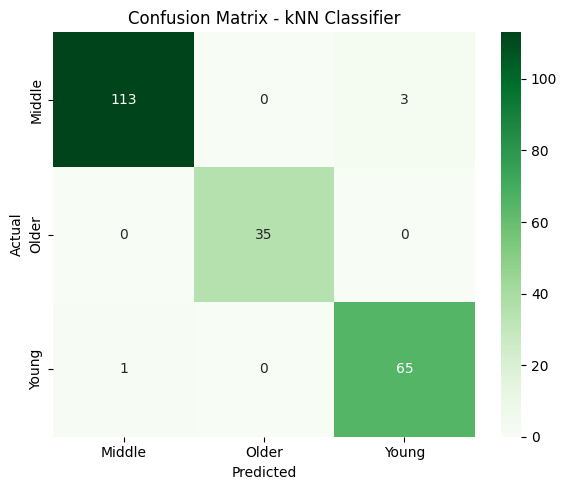

In [29]:
# Create confusion matrix for k-NN
knn_conf_matrix = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - kNN Classifier')
plt.tight_layout()
plt.show() # Display confusion matrix

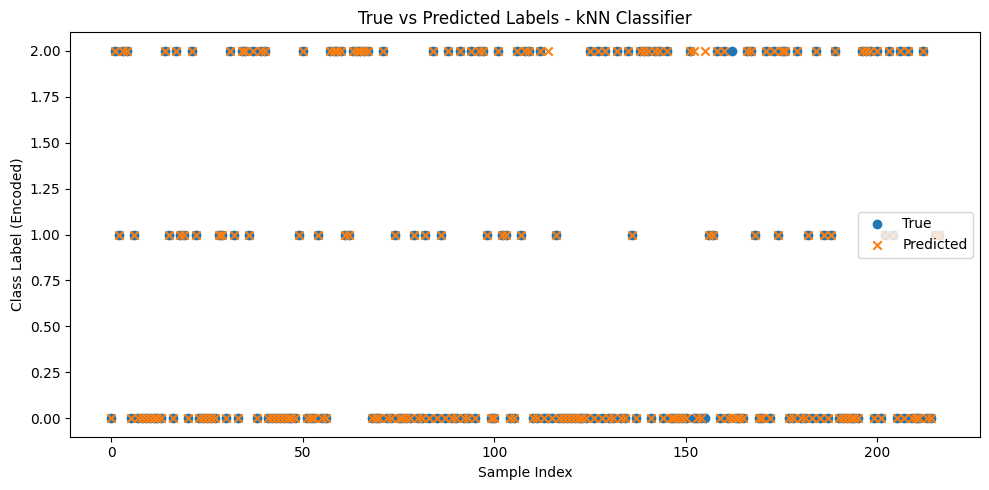

In [30]:
# Plot true vs. predicted labels for k-NN
label_encoder_knn = LabelEncoder()
y_test_knn_encoded = label_encoder_knn.fit_transform(y_test)
y_knn_pred_encoded = label_encoder_knn.transform(y_knn_pred)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_knn_encoded)), y_test_knn_encoded, label='True', marker='o')
plt.scatter(range(len(y_knn_pred_encoded)), y_knn_pred_encoded, label='Predicted', marker='x')
plt.title("True vs Predicted Labels - kNN Classifier")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (Encoded)")
plt.legend()
plt.tight_layout()
plt.show() # Display true vs. predicted labels plot

**Reasoning:**

**Assumptions:** Naïve Bayes assumes feature independence, which might not hold true for your dataset. If features are correlated, Naïve Bayes can make inaccurate predictions. k-NN doesn't make this assumption and considers the relationships between data points.

**Data Distribution:** Naïve Bayes makes assumptions about the underlying data distribution (e.g., Gaussian distribution for numerical features). If your data doesn't follow these assumptions, it can impact performance. k-NN is a non-parametric algorithm, meaning it doesn't rely on such assumptions.

**Decision Boundaries:** Naïve Bayes creates linear decision boundaries, while k-NN can create more complex, non-linear boundaries. This flexibility allows k-NN to potentially better capture the underlying patterns in your data.

**Model Complexity:** Naïve Bayes is a simpler model compared to k-NN. In some cases, a simpler model might be sufficient and even preferred to avoid overfitting. However, if the data has complex relationships, k-NN's ability to capture those relationships can lead to better performance.
